[[0.00000000e+00 4.82677036e-09]
 [1.05166847e-04 0.00000000e+00]
 [4.83767497e-04 9.72249458e-08]
 [4.94284182e-04 4.96467808e-08]
 [4.94284182e-04 1.37907725e-07]
 [9.35984940e-04 8.01243880e-07]
 [1.29355222e-03 7.50907560e-07]
 [1.93927666e-02 1.52594897e-06]
 [1.94348334e-02 1.60524591e-06]
 [1.95610336e-02 1.36045970e-06]
 [1.95820669e-02 1.37700863e-06]
 [1.96031003e-02 1.39355756e-06]
 [1.96241337e-02 1.32736185e-06]
 [1.96451671e-02 1.98035492e-06]
 [1.97713673e-02 2.09688695e-06]
 [1.98975675e-02 2.31478116e-06]
 [1.98975675e-02 3.06637826e-06]
 [1.99186009e-02 3.36977525e-06]
 [1.99186009e-02 3.18635798e-06]
 [1.99291175e-02 3.21600814e-06]
 [1.99396342e-02 2.70643909e-06]
 [1.99396342e-02 2.85675851e-06]
 [1.99396342e-02 3.30564816e-06]
 [1.99501509e-02 2.75263818e-06]
 [1.99606676e-02 2.79263142e-06]
 [1.99606676e-02 2.82641881e-06]
 [1.99606676e-02 2.98501270e-06]
 [1.99711843e-02 2.86848067e-06]
 [1.99817010e-02 2.92088561e-06]
 [1.99817010e-02 2.94777761e-06]
 [1.998170

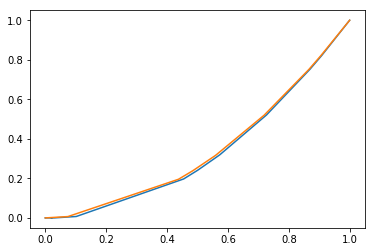

In [2]:
import numpy as np
import similaritymeasures
import matplotlib.pyplot as plt
import pandas as pd

#bug_name = "apache34464"
#bug_name = "apache29743"
#bug_name = "apache37184"
#bug_name = "apache53622"
bug_name = "gcc16811"

var_input_results_dir = "/home/boqin/Projects/stubs/var-inputs/"

max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))

ih_data = pd.read_csv(var_input_results_dir + bug_name + "-ih.csv", sep='\t')
ih_data = ih_data.sort_values(by=['rms'])
ih_data = ih_data.apply(max_min_scaler)
ih_data = ih_data.to_numpy()
print(ih_data)

pr_data = pd.read_csv(var_input_results_dir + bug_name + "-pr.csv", sep='\t')
pr_data = pr_data.sort_values(by=['rms'])
pr_data = pr_data.apply(max_min_scaler)
pr_data = pr_data.to_numpy()
print(pr_data)

# quantify the difference between the two curves using PCM
#pcm = similaritymeasures.pcm(ih_data, pr_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(ih_data, pr_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(ih_data, pr_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(ih_data, pr_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(ih_data, pr_data)

# print the results
#print(pcm, df, area, cl, dtw)
print("df:", "area:", "cl:", "dtw:")
print(df, area, cl, dtw)

# plot the data
plt.figure()
plt.plot(ih_data[:, 0], ih_data[:, 1])
plt.plot(pr_data[:, 0], pr_data[:, 1])
plt.show()
